## データセット生成

In [1]:
!pwd

/app


In [2]:
A = [((1, 'a'), (1, 'b')), ((2, 'c'), (3, 'd')), ((3, 'e'), (4, 'f'))]
numbers = [num for pair in A for num, _ in pair]
strings = [s for pair in A for _, s in pair]

print("Numbers:", numbers)
print("Strings:", strings)

Numbers: [1, 1, 2, 3, 3, 4]
Strings: ['a', 'b', 'c', 'd', 'e', 'f']


In [4]:
load('src/dataset/symbolic_utils.sage')
load('src/dataset/groebner.sage')
load('src/dataset/symbolic_utils.sage')
# load('src/dataset/buchberger.sage')
load('src/dataset/count_num_additions.sage')


import numpy as np
import time
import matplotlib.pyplot as plt

# これをしないと，sagemathが勝手にintやfloatをinteger型やRealNuber型に変換してしまうしてしまう
preparser(False)

In [11]:
nvars = 3
field = GF(7)

file_path = f'./data/pred_nadds/pred_nadds_n={nvars}_field=GF7/data_GF7_n={nvars}.test.lex.infix'


Ring = PolynomialRing(GF(7), 'x', nvars)
with open(file_path, 'r') as file:
    content = file.read()

content = content.split('\n') # 多項式系を要素として持つリスト

rets = [preprocess(F_G_str, field, nvars) for F_G_str in content]



In [36]:
while True:
    # weight_matrix = np.random.randint(-1000, 1000, size=(nvars, nvars))
    weight_matrix = np.random.normal(0, 300, size=(nvars, nvars)).astype(int)

    weight_matrix[0, :] = np.abs(weight_matrix[0, :])
    
    if validation(weight_matrix):
        break

id = 4
data, _, _ = zip(*rets)
F = data[id]

threshold = 20000

# weight_matrix_grev = to_matrix(nvars, 'grevlex')
print(F)
print(weight_matrix)
num_additions_counter = NumAdditionsCounter(weight_matrix, polynomial_list=F, coeff_field=field, num_variables=nvars, select_strategy='normal', stop_algorithm=True, threshold=threshold)

start = time.time()
GB_1, nadds_1 = num_additions_counter.run()
print(time.time() - start)

print(nadds_1)
print(weight_matrix)
print(F)
Ring = PolynomialRing(field, 'x', nvars)

start = time.time()
GB_2, nadds_2 = count_nadds(weight_matrix, polynomial_list=F, coeff_field=field, num_variables=nvars, select_strategy='normal', stop_algorithm=True, threshold=threshold)
print(time.time() - start)
print(nadds_2)

print(GB_1, is_groebner(Ring, GB_1))
print(GB_2, is_groebner(Ring, GB_2))


num_additions_counter = NumAdditionsCounter('grevlex', polynomial_list=F, coeff_field=field, num_variables=nvars, select_strategy='normal', stop_algorithm=True, threshold=threshold)
strat = time.time()
GB_3, nadds_3 = num_additions_counter.run()
print(time.time() - strat)
print(GB_3, is_groebner(Ring, GB_3))

print(nadds_3)

[-3*x0^4*x1 - 2*x0^3*x1^2 - 2*x0^3*x1*x2 + x2^5 + 2*x0^3*x1 - 2*x0^2*x2^2 + x0*x2^3 - 3*x2^4 - x0*x2^2 - 3*x2^3 + 3*x0 + x2 - 2, -2*x0^6*x1 + x0^5*x1^2 - 2*x0^4*x1^3 + x0^3*x1^4 + x0^5*x1*x2 + x0^3*x1^3*x2 + 3*x0^2*x2^5 + 2*x1^2*x2^5 - 2*x0*x2^6 - 2*x2^7 - x0^5*x1 - x0^4*x1^2 + 3*x0^3*x1^3 - 2*x0^4*x1*x2 - 2*x0^3*x1^2*x2 + x0^4*x2^2 + x0^3*x1*x2^2 + x0^2*x1^2*x2^2 + 3*x0^3*x2^3 + 3*x0*x1^2*x2^3 - 2*x0^2*x2^4 + x1^2*x2^4 + 2*x0*x2^5 - 2*x1*x2^5 + 2*x2^6 + 3*x0^4*x1 - 2*x0^3*x1^2 + x0^3*x1*x2 - 3*x0^3*x2^2 - 3*x0^2*x1*x2^2 - 3*x0*x1^2*x2^2 - x0^2*x2^3 - 2*x0*x1*x2^3 - 2*x1^2*x2^3 + x0*x2^4 - x1*x2^4 - 2*x0^3*x1 + 2*x0^2*x2^2 + 2*x0*x1*x2^2 + 3*x0*x2^3 - x1*x2^3 - x2^4 + 2*x0^3 + x0*x1^2 + 3*x0^2*x2 + 2*x1^2*x2 - x0*x2^2 + 2*x1*x2^2 + 3*x2^3 + x0^2 + 3*x0*x1 - x1^2 - 2*x0*x2 + 2*x1*x2 - 2*x2^2 - x0 + 2*x1 + 3, 2*x0^4*x1^4 - x0^3*x1^5 - x0^3*x1^4*x2 - 3*x0*x1^2*x2^5 + 2*x1^3*x2^5 + x0^2*x2^6 + 3*x0*x1*x2^6 + x1^2*x2^6 + 3*x0*x2^7 + 3*x1*x2^7 + 2*x2^8 + x0^3*x1^4 - x0^5*x1*x2 - 3*x0^4*x1^2*

1.098059892654419
20001
[[  18  327  323]
 [ 302  -99  -99]
 [ 452 -180 -316]]
[-3*x0^4*x1 - 2*x0^3*x1^2 - 2*x0^3*x1*x2 + x2^5 + 2*x0^3*x1 - 2*x0^2*x2^2 + x0*x2^3 - 3*x2^4 - x0*x2^2 - 3*x2^3 + 3*x0 + x2 - 2, -2*x0^6*x1 + x0^5*x1^2 - 2*x0^4*x1^3 + x0^3*x1^4 + x0^5*x1*x2 + x0^3*x1^3*x2 + 3*x0^2*x2^5 + 2*x1^2*x2^5 - 2*x0*x2^6 - 2*x2^7 - x0^5*x1 - x0^4*x1^2 + 3*x0^3*x1^3 - 2*x0^4*x1*x2 - 2*x0^3*x1^2*x2 + x0^4*x2^2 + x0^3*x1*x2^2 + x0^2*x1^2*x2^2 + 3*x0^3*x2^3 + 3*x0*x1^2*x2^3 - 2*x0^2*x2^4 + x1^2*x2^4 + 2*x0*x2^5 - 2*x1*x2^5 + 2*x2^6 + 3*x0^4*x1 - 2*x0^3*x1^2 + x0^3*x1*x2 - 3*x0^3*x2^2 - 3*x0^2*x1*x2^2 - 3*x0*x1^2*x2^2 - x0^2*x2^3 - 2*x0*x1*x2^3 - 2*x1^2*x2^3 + x0*x2^4 - x1*x2^4 - 2*x0^3*x1 + 2*x0^2*x2^2 + 2*x0*x1*x2^2 + 3*x0*x2^3 - x1*x2^3 - x2^4 + 2*x0^3 + x0*x1^2 + 3*x0^2*x2 + 2*x1^2*x2 - x0*x2^2 + 2*x1*x2^2 + 3*x2^3 + x0^2 + 3*x0*x1 - x1^2 - 2*x0*x2 + 2*x1*x2 - 2*x2^2 - x0 + 2*x1 + 3, 2*x0^4*x1^4 - x0^3*x1^5 - x0^3*x1^4*x2 - 3*x0*x1^2*x2^5 + 2*x1^3*x2^5 + x0^2*x2^6 + 3*x0*x1*x2^6 + x1^

In [23]:
max_itr = 10
threshold = 5000
result = np.zeros((0, 2))


np.random.seed(1)
max_sample = 5

for ret in rets:
    
    F, F_str, num_tokens_F = ret
    if num_tokens_F > 1000 or num_tokens_F < 500:
        continue

    num_additions_counter = NumAdditionsCounter('grevlex', polynomial_list=F, coeff_field=field, num_variables=nvars, select_strategy='normal', stop_algorithm=True, threshold=threshold)

    _, nadds_grev = num_additions_counter.run()

    for i in range(max_itr):

        while True:
            weight_matrix = np.random.randint(-1000, 1000, size=(nvars, nvars))
            weight_matrix[0, :] = np.abs(weight_matrix[0, :])
            
            if validation(weight_matrix):
                break
                

        num_additions_counter = NumAdditionsCounter(weight_matrix, polynomial_list=F, coeff_field=field, num_variables=nvars, select_strategy='normal', stop_algorithm=True, threshold=threshold)
        _, nadds = num_additions_counter.run() 
    
        if nadds <= threshold or max_itr - 1 == i:
            break
    
    result = np.vstack((result, np.array([nadds_grev, nadds])))


In [24]:
print(np.max(result, axis=0))
print(np.min(result, axis=0))
print(np.mean(result, axis=0))
print(np.median(result, axis=0))


print('grev ', sum(result[:, 0] >= threshold))
print('random ', sum(result[:, 1] >= threshold))


[5002. 5001.]
[18. 18.]
[1023.83444339 1262.25927688]
[329.5 560. ]
grev  111
random  35


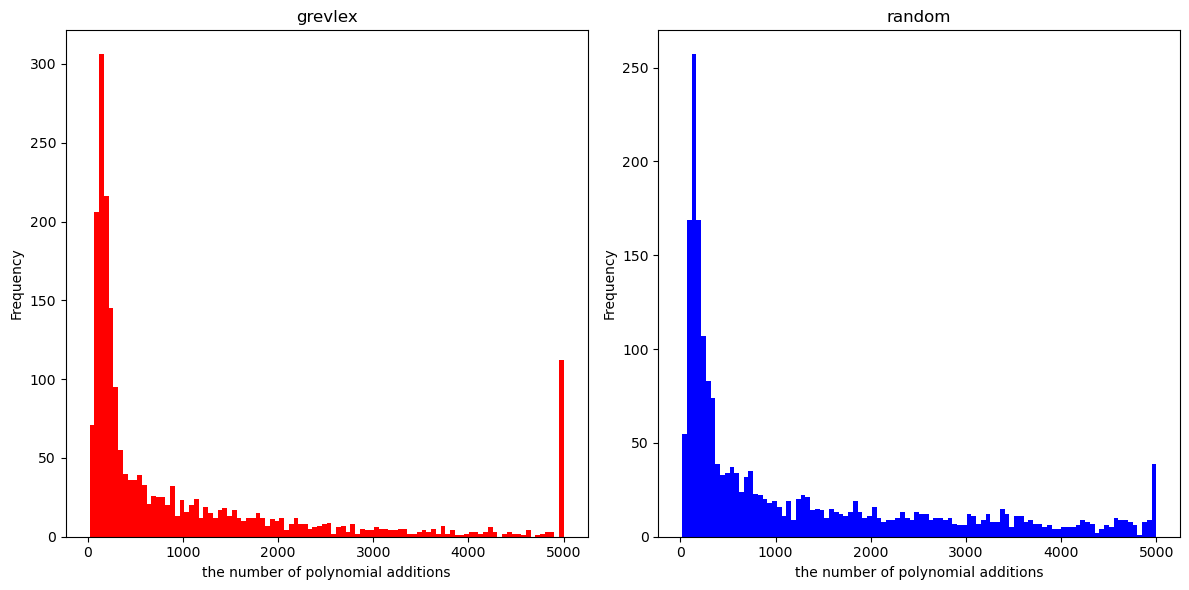

In [31]:
plt.figure(figsize=(12, 6))

# Plot histogram for result[:, 0]
plt.subplot(1, 2, 1)
plt.hist(result[:, 0], bins=100, color='red')
plt.title('grevlex')
plt.xlabel('the number of polynomial additions')
plt.ylabel('Frequency')

# Plot histogram for result[:, 1]
plt.subplot(1, 2, 2)
plt.hist(result[:, 1], bins=100, color='blue')
plt.title('random')
plt.xlabel('the number of polynomial additions')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

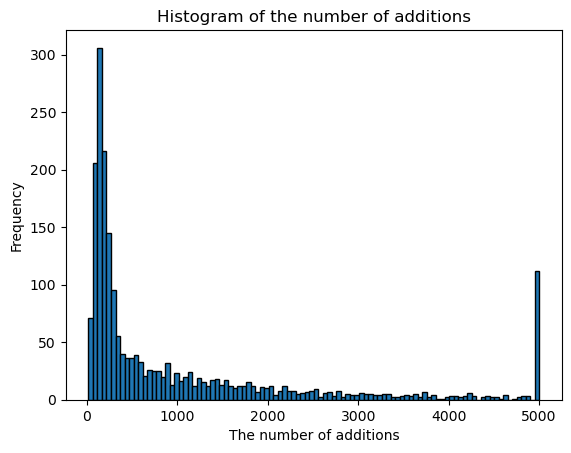

In [26]:
plt.hist(result[:, 0], bins=100, edgecolor='black')
plt.title('Histogram of the number of additions')

# plt.xlim(0, 2000)
# plt.ylim(0, 800)
plt.xlabel('The number of additions')
plt.ylabel('Frequency')
plt.show()

In [ ]:
b = np.random.normal(
    loc   = 0,      # 平均
    scale = 300,    # 標準偏差
    size  = 1000000,# 出力配列のサイズ(タプルも可)
)

plt.hist(b,bins=1000)
plt.xlim(-1000,1000)

In [ ]:
timeout = 2

all_nadds = np.array([])
max_itr = 1
threshold = 10000

np.random.seed(42)
results = {}
for F_str in content[:1000]:
    F_str = F_str.split(':')[0]
    F_str = F_str.split('[SEP]')
    

    F_str = [f_str.strip() for f_str in F_str] # 両端の空白文字を削除
    print(F_str)
    # results["non_groebner"] = F_str

    F = [sequence_to_poly(f_str, Ring) for f_str in F_str]
    print(F)

    # weight_matrix = to_matrix(nvars, 'grevlex')
    for _ in range(max_itr):

        while True:
            # weight_matrix = np.random.randint(-1000, 1000, size=(nvars, nvars))
            weight_matrix = np.random.normal(0, 300, size=(nvars, nvars)).astype(int)
            weight_matrix[0, :] = np.abs(weight_matrix[0, :])
            
            if validation(weight_matrix):
                break
                
        start = time.time()
        nadds = count_nadds(weight_matrix, polynomial_list=F, coeff_field=field, num_variables=nvars, select_strategy='normal', stop_algorithm=True, threshold=threshold)
        end = time.time()

        if end - start < timeout:
            all_nadds = np.append(all_nadds, nadds)
            break
        else:
            all_nadds = np.append(all_nadds, threshold)
            break
            

        if nadds <= threshold:
            weight_matrix = weight_matrix.reshape(-1)
            print(weight_matrix)
            # results['weight_matrix'] = weight_matrix
            print(nadds)
            
            all_nadds = np.append(all_nadds, nadds)
            break
    print()

In [ ]:
print(np.max(all_nadds))
print(np.min(all_nadds))
print(np.mean(all_nadds))
print(np.median(all_nadds))
print(len(all_nadds))

sum(all_nadds >= threshold)


In [ ]:
ret = plt.hist(all_nadds, bins=10, range=(0, 10000))
print(ret)
counts, bin_edges = ret[0], ret[1]
print("Counts:", counts)
print("Bin edges:", bin_edges)

In [ ]:
200 > all_nadds and all_nadds > 100

In [ ]:
import matplotlib.pyplot as plt

plt.hist(all_nadds, bins=100, edgecolor='black')
plt.title('Histogram of all_nadds')

# plt.xlim(0, 2000)
# plt.ylim(0, 800)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
weight_matrix = np.random.randint(-100000000, 100000001, size=(3, 3))
print(weight_matrix) 
weight_matrix[0, :] = np.abs(weight_matrix[0, :])

print(weight_matrix)
str(weight_matrix.reshape(-1).tolist())

In [ ]:
content[:10]

In [9]:
def get_matrix_nadds(F_G_str, nvars, field, max_itr=100, threshold=10000):
    F_str_org = F_G_str.split(':')[0]
    F_str = F_str_org.split('[SEP]')

    F_str = [f_str.strip() for f_str in F_str] # 両端の空白文字を削除
    print(F_str)

    Ring = PolynomialRing(field, 'x', nvars)
    F = [sequence_to_poly(f_str, Ring) for f_str in F_str]
    print(F)

    for _ in range(max_itr):

        while True:
            weight_matrix = np.random.randint(-100000000, 100000001, size=(nvars, nvars))
            weight_matrix[0, :] = np.abs(weight_matrix[0, :])
            
            if validation(weight_matrix):
                break
    
        nadds = count_nadds(weight_matrix, polynomial_list=F, coeff_field=field, num_variables=nvars, select_strategy='normal', stop_algorithm=True, threshold=threshold)

        if nadds <= threshold:
            weight_matrix = weight_matrix.reshape(-1)
            weight_matrix = str(weight_matrix.tolist())
            print(weight_matrix)
            nadds = str(nadds)
            print(nadds)
            break
    # return F_str_org + ": <weight_matrix> " + weight_matrix + ' <nadds> ' + nadds
    return F_str_org + " : " + weight_matrix + ' : ' + nadds

    

In [ ]:
A = np.array([1, 2, 3])
B = A.astype(str)

sum=''
for b in B:
    sum += b
    sum += ' '
print(sum)
print(type(sum))
print(B.dtype)
print(B)
C = B.tolist()
C

In [ ]:
field = GF(7)
F_matrix_nadds = []
for F_G_str in content[:10]:
    F_matrix_nadds.append(get_matrix_nadds(F_G_str, 3, field))

In [16]:
F_matrix_nadds = '\n'.join(F_matrix_nadds)


In [ ]:
F_matrix_nadds

In [19]:
out_path = f'./data/pred_nadds/pred_nadds_n={nvars}_field=GF7/data_GF7_n={nvars}.test.lex.infix.F_matrix_nadds'
with open(out_path, 'w') as f:
    f.write(F_matrix_nadds)

In [ ]:
import torch

A = np.array([1.1, 2.2]).astype(int)
B = torch.tensor(A)
B.dtype

In [ ]:
def __call__(self, num_additions_list):
        num_additions_list = np.array(num_additions_list)

        # 多項式加算数がどのレンジにあるかを判定する
        labels = np.digitize(num_additions_list, self.bins) - 1 # 最初のbinに含まれるデータのラベルは0


        if self.is_soft_labels: # ソフトラベルを取得する
            soft_labels = np.zeros((0, self.num_classes))

            for label in labels:
                soft_labels = np.vstack((soft_labels, self.get_soft_label(label)))

            return torch.tensor(soft_labels).float() # 二次元テンソル(データ数 * num_classes)
        
        else: # ハードラベルを取得する
            hard_labels = np.eye(self.num_classes)[labels] # one-hotベクトルに変換
            return torch.tensor(hard_labels, dtype=torch.long) # 一次元テンソル(データ数)

    def get_soft_label(self, correct_class_id):

        assert 0 <= correct_class_id and correct_class_id <= self.num_classes - 1, '0 <= correct_class_id <= num_classes - 1 である必要がある'
        
        # ソフトマックス関数の処理
        diffs = np.ones(self.num_classes) * correct_class_id - np.arange(self.num_classes)
        dist = np.abs(diffs)
        get_soft_label = np.exp(-dist) / np.sum(np.exp(-dist))

        return get_soft_label


In [10]:
def get_soft_label(correct_class_id, T):

        
        # ソフトマックス関数の処理
        diffs = np.ones(10) * correct_class_id - np.arange(10)
        dist = np.abs(diffs)
        get_soft_label = np.exp(-dist / T) / np.sum(np.exp(-dist / T))

        return get_soft_label

In [13]:
import numpy as np
soft_labels = np.zeros((0, 10))
labels = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])
for label in labels:
    soft_labels = np.vstack((soft_labels, get_soft_label(label, 3)))

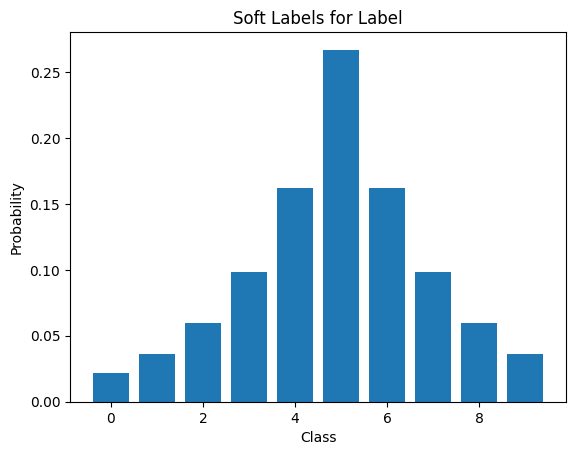

In [23]:
import matplotlib.pyplot as plt
import numpy as np

i = 4
T = 2
soft_labels = np.zeros((0, 10))
labels = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])
for label in labels:
    soft_labels = np.vstack((soft_labels, get_soft_label(label, T)))


plt.bar(range(len(soft_labels[i])), soft_labels[i])
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Soft Labels for Label')
plt.show()

In [ ]:
def preprocess(F_G_str, field, nvars):
    F_str = F_G_str.split(':')[0]
    F_str = F_str.strip()
    num_tokens_F = int(len(F_str.split()))
    F_list = F_str.split('[SEP]')

    Ring = PolynomialRing(field, 'x', nvars)
    F = [sequence_to_poly(f_str.strip(), Ring) for f_str in F_list] # infix以外はうまくいかない
    
    return F, F_str, num_tokens_F

F_G_str = content[0]
F_G_str

In [ ]:
F, F_str, num_tokens_F = preprocess(F_G_str, field, nvars)
print(F)
print(F_str)
print(num_tokens_F)

In [ ]:
s = ['a', '', 'b']

'\n'.join(s)